<h1 align="center" style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">Exploratory Data Analysis of Online Retail Data</h1>

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">1. Import Libraries and Load Dataset</h2>

In [3]:
import numpy as np
import pandas as pd

pd.set_option("display.max_columns", 120)
pd.set_option("display.max_rows", 120)
pd.set_option('display.float_format', '{:.2f}'.format)

import warnings
warnings.filterwarnings(action='ignore')

ModuleNotFoundError: No module named 'numpy'

In [ ]:
data = pd.read_excel('Online Retail.xlsx')

data source: https://archive.ics.uci.edu/dataset/352/online+retail

<a id="data_preview"></a>
<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">2. Dataset Preview</h2>

<a href="#table_of_contents" style="text-decoration: None">Table of Contents</a>

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom


In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
data.shape

(541909, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.00,541909.00,406829.00
mean,9.55,4.61,15287.69
std,218.08,96.76,1713.60
min,-80995.00,-11062.06,12346.00
25%,1.00,1.25,13953.00
50%,3.00,2.08,15152.00
75%,10.00,4.13,16791.00
max,80995.00,38970.00,18287.00


In [ ]:
len(data.Description.unique())

4224

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3. Data Wrangling</h2>

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.1. Extract useful information from InvoiceDate</h4>

In [ ]:
data['invoice_month'] = data['InvoiceDate'].dt.month_name()
data['invoice_year'] = data['InvoiceDate'].dt.year
data['invoice_day'] = data['InvoiceDate'].dt.day_name()

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,invoice_month,invoice_year,invoice_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.00,United Kingdom,December,2010,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,December,2010,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.00,United Kingdom,December,2010,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,December,2010,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.00,United Kingdom,December,2010,Wednesday


<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">3.2. Sort Data by invoice year and month</h4>

In [ ]:
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

data['invoice_month'] = pd.Categorical(data['invoice_month'], categories=month_order, ordered=True)

data.sort_values(by=['invoice_year', 'invoice_month'], inplace=True)

<h2 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px">4. Exploratory Data Analysis</h2>

In [ ]:
import matplotlib.pyplot as plt
# import cufflinks as cf
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()

sns.set(style="whitegrid")

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> What are the top 5 selling products?</h4>

In [ ]:
# Group by product and sum the quantities sold
top_products = data.groupby('Description')['Quantity'].sum().reset_index()

# Sort the products by total quantity sold in descending order
top_products = top_products.sort_values(by='Quantity', ascending=False).head(5)

top_products

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039


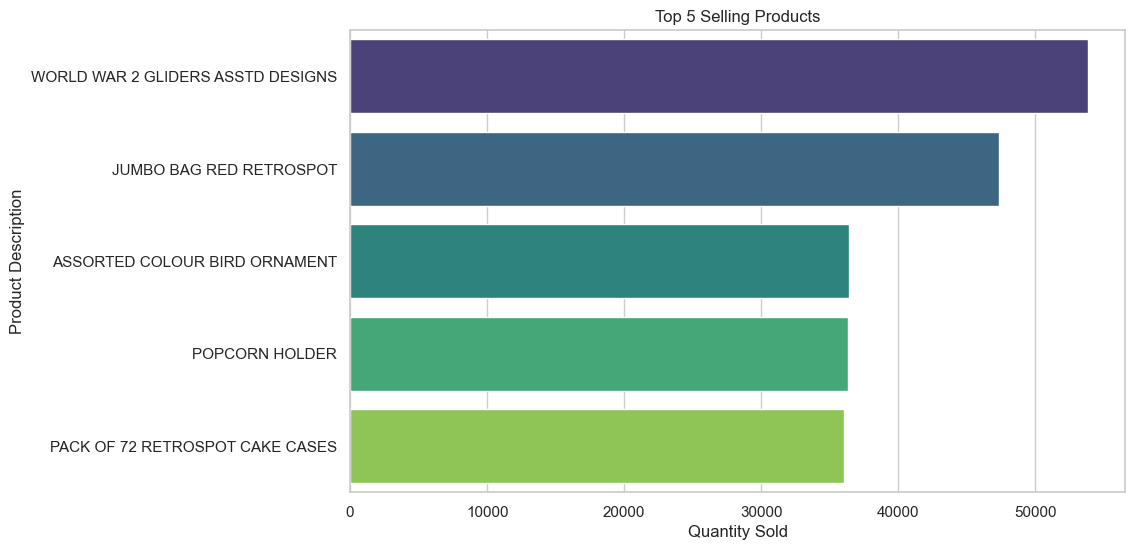

In [ ]:
# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Quantity', y='Description', data=top_products, palette='viridis')
plt.title('Top 5 Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Description')
plt.show()

The dataset contains approximately 542 thousand purchase records with world war 2 glider designs being the most purchased product.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Which products have the highest total sales?</h4>

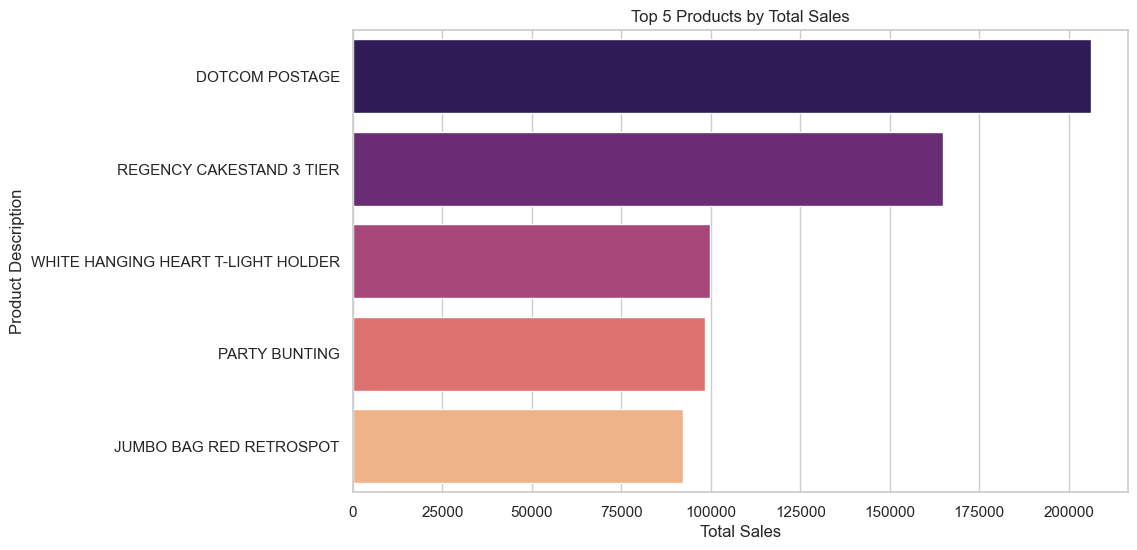

In [ ]:
# Create a new column for total sales
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Group by product and calculate the total sales
top_sales_products = data.groupby('Description')['TotalSales'].sum().reset_index()

# Sort the products by total sales in descending order
top_sales_products = top_sales_products.sort_values(by='TotalSales', ascending=False).head(5)

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='TotalSales', y='Description', data=top_sales_products, palette='magma')
plt.title('Top 5 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.show()

DOTCOM POSTAGE and REGENCY CAKESTAND 3 TIER are the top purchased products by total sales 

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> What is the distribution of total product sold across the years?</h4>

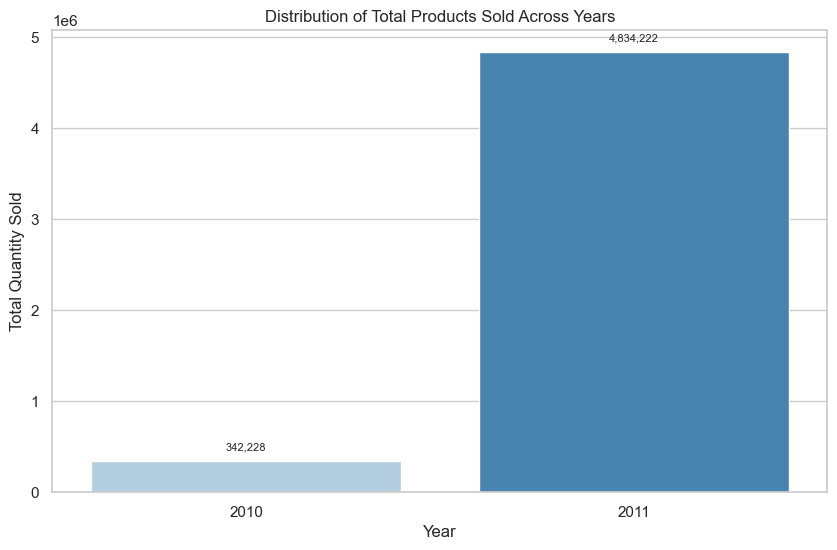

In [ ]:
# Group by year and calculate total quantity sold
total_quantity_by_year = data.groupby('invoice_year')['Quantity'].sum().reset_index()

# Plot using Seaborn
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='invoice_year', y='Quantity', data=total_quantity_by_year, palette='Blues')

# Add counts at the top of each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8)

plt.title('Distribution of Total Products Sold Across Years')
plt.xlabel('Year')
plt.ylabel('Total Quantity Sold')
plt.show()

The total number of products sold in 2011 was significantly higher.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Which is the distribution of total product sold across months?</h4>

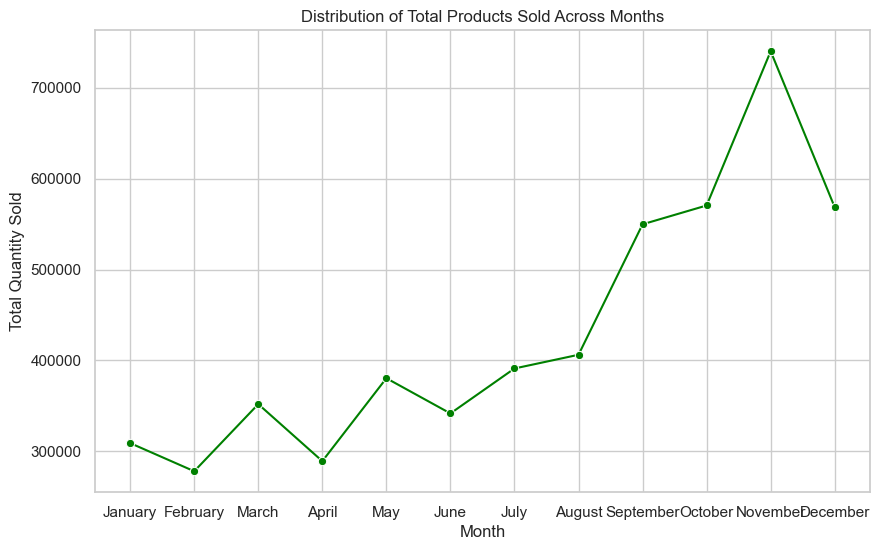

In [ ]:
# Group by month and calculate total quantity sold
total_quantity_by_month = data.groupby('invoice_month')['Quantity'].sum().reset_index()

# Plot using Seaborn line plot
plt.figure(figsize=(10, 6))
line_plot = sns.lineplot(x='invoice_month', y='Quantity', data=total_quantity_by_month, marker='o', color='green')

plt.title('Distribution of Total Products Sold Across Months')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.show()

Across 2010 and 2011 combined, the highest number of product appear to be brought in the month of November.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Who are the top 5 customers based on total spending?</h4>

In [ ]:
# Create a new column for total spending
data['TotalSales'] = data['Quantity'] * data['UnitPrice']

# Group by customer and calculate total spending
top_customers = data.groupby('CustomerID')['TotalSales'].sum().reset_index()

# Sort the customers by total spending in descending order
top_customers = top_customers.sort_values(by='TotalSales', ascending=False).head(5)

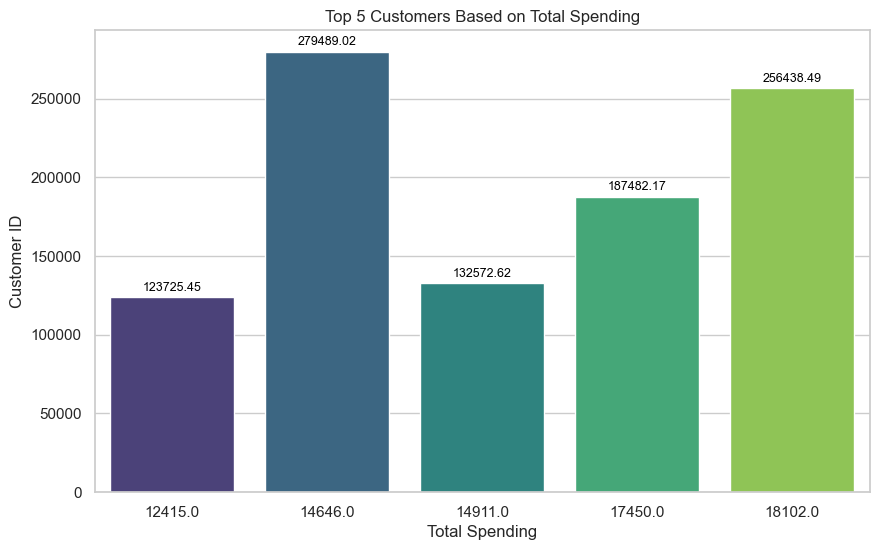

In [ ]:
# Plot using Seaborn bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='CustomerID', y='TotalSales', data=top_customers, palette='viridis')

# Add counts at the top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
    
plt.title('Top 5 Customers Based on Total Spending')
plt.xlabel('Total Spending')
plt.ylabel('Customer ID')
plt.show()

Customer with id 14646 appears to be the highest spender

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Do certain products sell better during specific months?</h4>

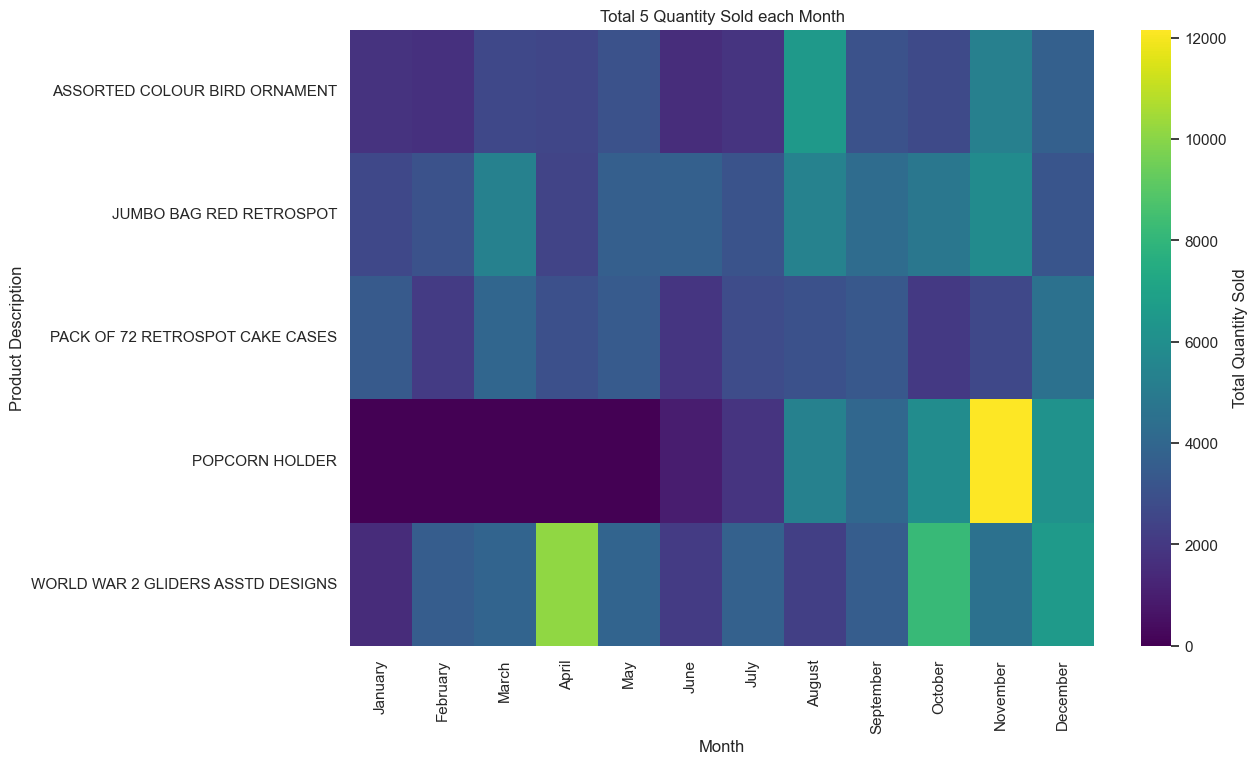

In [ ]:
# Group by product and calculate total quantity sold
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5).index

# Filter data for the top 5 products
filtered_data = data[data['Description'].isin(top_products)]

# Create a pivot table to show the total quantity sold for each top product and month
pivot_data = filtered_data.pivot_table(values='Quantity', index='Description', columns='invoice_month', aggfunc='sum', fill_value=0)

# Plot using Seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', cbar_kws={'label': 'Total Quantity Sold'})
plt.title('Total 5 Quantity Sold each Month')
plt.xlabel('Month')
plt.ylabel('Product Description')
plt.show()


The heatmap above answers the question “do certain products sell better during specific months?”. POPCORN HOLDER seems to be the best-selling product in November while WORLD WAR 2 GLIDERS the best-selling in April and so on. 

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Segmentation by Geography: Can we identify target markets for specific products based on geography?
</h4>

In [ ]:
data.Country.value_counts(normalize=True, ascending=False).head()

United Kingdom   0.91
Germany          0.02
France           0.02
EIRE             0.02
Spain            0.00
Name: Country, dtype: float64

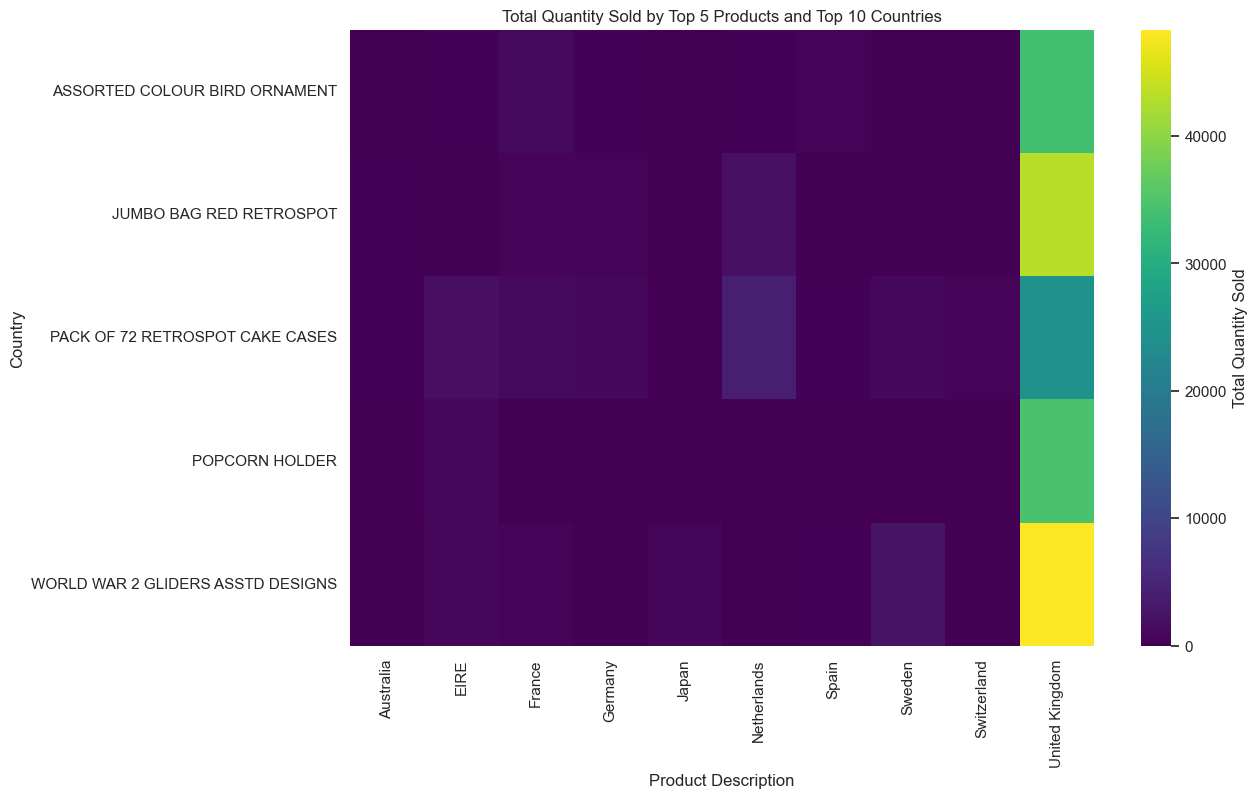

In [ ]:
# Create a list of the top 10 countries based on total quantity sold
top_countries = data.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10).index

# Filter data for the top 10 countries
filtered_data = data[data['Country'].isin(top_countries)]

# Identify the top 5 products overall
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(5).index

# Filter data for the top 5 products and top 10 countries
filtered_data = filtered_data[filtered_data['Description'].isin(top_products)]

# Create a pivot table to show the total quantity sold for each product and country
pivot_data = filtered_data.pivot_table(values='Quantity', index='Description', columns='Country', aggfunc='sum', fill_value=0)

# Plot using Seaborn heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', cbar_kws={'label': 'Total Quantity Sold'})
plt.title('Total Quantity Sold by Top 5 Products and Top 10 Countries')
plt.xlabel('Product Description')
plt.ylabel('Country')
plt.show()


There appears to be very less product sold in other countries. Majority of the total sales was completed in United Kingdom (91%). In addition, World War 2 Gliders are the most sold products.

<h4 style="background-color:#0b0504;color:white;border-radius: 8px; padding:12px"> Segmentation by Product Preferences: Can we group customers based on the types of products they frequently purchase?</h4>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Identify the top 10 products based on total quantity sold
top_products = data.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10).index

# Filter data for the top 10 products
filtered_data = data[data['Description'].isin(top_products)]

# Create a pivot table to represent the quantity of each top product purchased by each customer
pivot_data = filtered_data.pivot_table(values='Quantity', index='CustomerID', columns='Description', fill_value=0)

In [ ]:
# Standardize the data to have zero mean and unit variance
scaler = StandardScaler()
scaled_data = scaler.fit_transform(pivot_data)

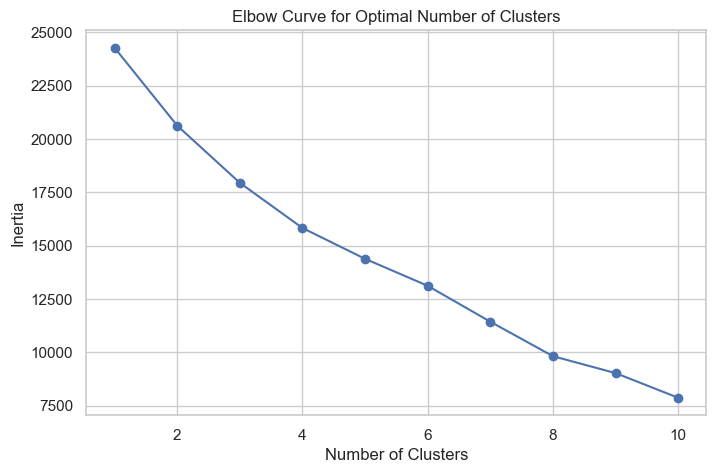

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [ ]:
optimal_clusters = 4

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

In [ ]:
# Add the cluster labels to the original DataFrame
pivot_data['Cluster'] = clusters

# Display the count of customers in each cluster
print(pivot_data['Cluster'].value_counts())

0    2415
3       7
2       4
1       2
Name: Cluster, dtype: int64


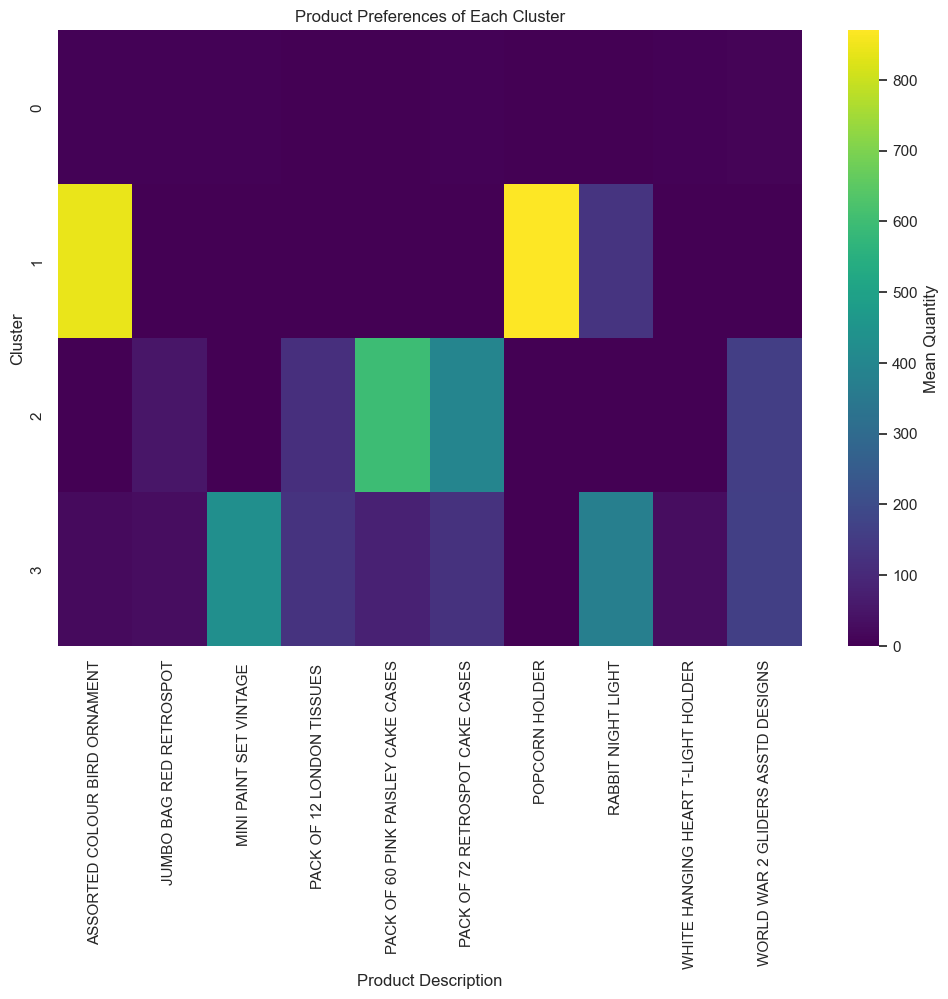

In [ ]:
# Plot a heatmap to visualize the product preferences of each cluster
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data.groupby('Cluster').mean(), cmap='viridis', cbar_kws={'label': 'Mean Quantity'})
plt.title('Product Preferences of Each Cluster')
plt.xlabel('Product Description')
plt.ylabel('Cluster')
plt.show()

We observe that most product preference by customers fall into the first cluster. 